In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/new_matches.csv')
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Performance Int,Performance TklW,Performance PKwon,Performance PKcon,Performance OG,Performance Recov,Aerial Duels Won,Aerial Duels Lost,Season,Team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,5.0,4.0,0.0,0.0,0.0,40.0,18.0,11.0,2024-2025,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,7.0,10.0,0.0,0.0,0.0,47.0,6.0,8.0,2024-2025,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,10.0,17.0,0.0,0.0,0.0,53.0,13.0,5.0,2024-2025,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,11.0,8.0,0.0,0.0,0.0,47.0,21.0,12.0,2024-2025,Liverpool
4,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,6.0,14.0,0.0,0.0,0.0,44.0,9.0,6.0,2024-2025,Liverpool


In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent',
       ...
       'performance int', 'performance tklw', 'performance pkwon',
       'performance pkcon', 'performance og', 'performance recov',
       'aerial duels won', 'aerial duels lost', 'season', 'team'],
      dtype='object', length=135)

In [4]:
df['team'].value_counts()

team
Liverpool                   276
Brighton and Hove Albion    276
Crystal Palace              276
Manchester City             276
West Ham United             276
Manchester United           276
Newcastle United            276
Everton                     276
Tottenham Hotspur           276
Arsenal                     276
Chelsea                     276
Wolverhampton Wanderers     238
Southampton                 238
Leicester City              238
Burnley                     228
Aston Villa                 200
Bournemouth                 200
Fulham                      162
Watford                     152
Brentford                   124
Sheffield United            114
Nottingham Forest            86
Leeds United                 76
Norwich City                 76
West Bromwich Albion         76
Huddersfield Town            76
Luton Town                   38
Cardiff City                 38
Swansea City                 38
Stoke City                   38
Ipswich Town                 10
Nam

In [5]:
df.dtypes

date                  object
time                  object
comp                  object
round                 object
day                   object
                      ...   
performance recov    float64
aerial duels won     float64
aerial duels lost    float64
season                object
team                  object
Length: 135, dtype: object

In [6]:
df['round'] = df['round'].str.replace('Matchweek ', '')
df['date'] = pd.to_datetime(df['date'])
df.drop(columns=['comp'], inplace=True)
df.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,performance int,performance tklw,performance pkwon,performance pkcon,performance og,performance recov,aerial duels won,aerial duels lost,season,team
0,2024-08-17,12:30,1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,...,5.0,4.0,0.0,0.0,0.0,40.0,18.0,11.0,2024-2025,Liverpool
1,2024-08-25,16:30,2,Sun,Home,W,2.0,0.0,Brentford,2.5,...,7.0,10.0,0.0,0.0,0.0,47.0,6.0,8.0,2024-2025,Liverpool
2,2024-09-01,16:00,3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,...,10.0,17.0,0.0,0.0,0.0,53.0,13.0,5.0,2024-2025,Liverpool
3,2024-09-14,15:00,4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,...,11.0,8.0,0.0,0.0,0.0,47.0,21.0,12.0,2024-2025,Liverpool
4,2024-09-21,15:00,5,Sat,Home,W,3.0,0.0,Bournemouth,2.0,...,6.0,14.0,0.0,0.0,0.0,44.0,9.0,6.0,2024-2025,Liverpool


In [7]:
df['venue'] = df['venue'].astype('category').cat.codes
df['opponent'] = df['opponent'].astype('category').cat.codes
df['time'] = df['time'].str.replace(':.+', '', regex=True).astype(int)
df['day'] = df['date'].dt.dayofweek
df.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,performance int,performance tklw,performance pkwon,performance pkcon,performance og,performance recov,aerial duels won,aerial duels lost,season,team
0,2024-08-17,12,1,5,0,W,2.0,0.0,12,2.6,...,5.0,4.0,0.0,0.0,0.0,40.0,18.0,11.0,2024-2025,Liverpool
1,2024-08-25,16,2,6,1,W,2.0,0.0,3,2.5,...,7.0,10.0,0.0,0.0,0.0,47.0,6.0,8.0,2024-2025,Liverpool
2,2024-09-01,16,3,6,0,W,3.0,0.0,18,1.8,...,10.0,17.0,0.0,0.0,0.0,53.0,13.0,5.0,2024-2025,Liverpool
3,2024-09-14,15,4,5,1,L,0.0,1.0,21,0.9,...,11.0,8.0,0.0,0.0,0.0,47.0,21.0,12.0,2024-2025,Liverpool
4,2024-09-21,15,5,5,1,W,3.0,0.0,2,2.0,...,6.0,14.0,0.0,0.0,0.0,44.0,9.0,6.0,2024-2025,Liverpool


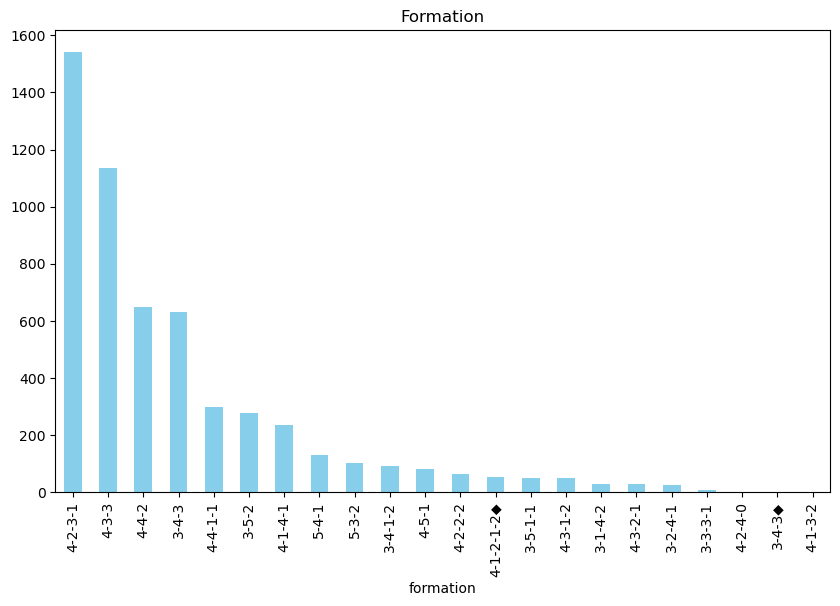

In [8]:
fmt = df['formation'].value_counts()
fmt.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Formation')
plt.show()

In [9]:
for formation in df['formation'].unique():
    formation = formation.split('-')
    if len(formation[-1].split()) > 1:
        # formation[-1] = formation[-1].split()[0]
        print(formation)